In [396]:
import numpy as np

filename = "iris.csv"

numSamples = 150
numFeatures = 4

## Point1: Load the Dataset

In [397]:
def loadIrisDataset(path):
    rawData = np.genfromtxt(path, delimiter=',', dtype = "str")
    
    #extract the 4 features and insert them into D
    D = rawData[:, 0:4] #D shape: (150, 4)
    D = np.array(D, np.float32).T  #Dont't do reshape! Because I want onr row= 150 samples of the same feature! .reshape((numFeatures, numSamples))

    #L_string = rawData[:, 4].reshape((numSamples, 1))  
    classLabels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    L = np.array([classLabels[name] for name in rawData[:, 4]], dtype=int) #.reshape((numSamples, 1)) #I want a column vector of shape (150, 1)
    

    return D, L

In [398]:
D, L = loadIrisDataset(filename)

In [399]:
L[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [400]:
D[0, :]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

In [401]:
print("D shape:", D.shape)
print("L shape:", L.shape)

D shape: (4, 150)
L shape: (150,)


D has 4 rows (one row = one different feature), and 150 columns (1 column = 1 sample)
L is a row vector having all the class labels
D[i, j] -> i identifies the the FEATURE (0 to 3), j identifies the SAMPLE (0 to 149)

In [402]:
print("first sample, first feature:", D[0, 0])
print("first sample, second feature:", D[1, 0])
print("first element, third feature:", D[2, 0])
print("first element, fourth feature:", D[3, 0])
print("first element, class Label:", L[0])

first sample, first feature: 5.1
first sample, second feature: 3.5
first element, third feature: 1.4
first element, fourth feature: 0.2
first element, class Label: 0


In [403]:
finalList = []
for row in D:
    finalList.append(row)
finalList.append(L)

finalList

[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3

## Point 2: Visualizing DataSet

In [404]:
import matplotlib.pyplot as plt

In [405]:
x = finalList[:4]
y = finalList[-1]
#x[0][0]
x[0][:] #first feature, 150 samples

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

### Class labels are ORDERED: FIRST LABEL 0 (SETOSA), THEN 1 (VERSICOLOR), THEN 2 (VIRGINICA)

In [406]:

def densityFeaturePlots(x, y):
    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}
    for i in range(numFeatures):
        plt.figure(figsize=(6,4))
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            #print(sample_with_that_class)
            plt.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            plt.legend()  # Mostra la legenda

        plt.title(f"Feature {featuresNames[i]} Distribution")
        plt.xlabel(featuresNames[i])
        plt.ylabel("Density")
        plt.show()

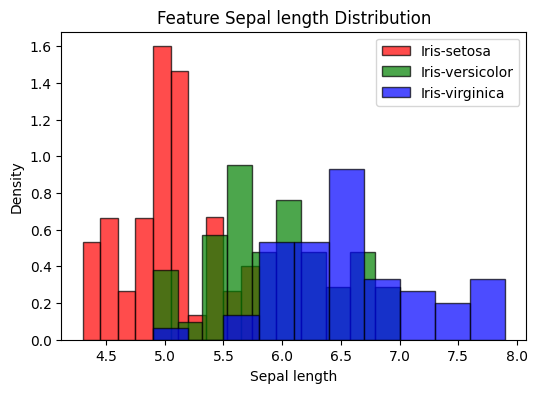

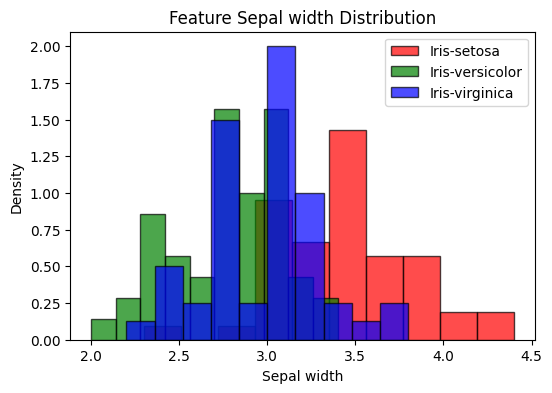

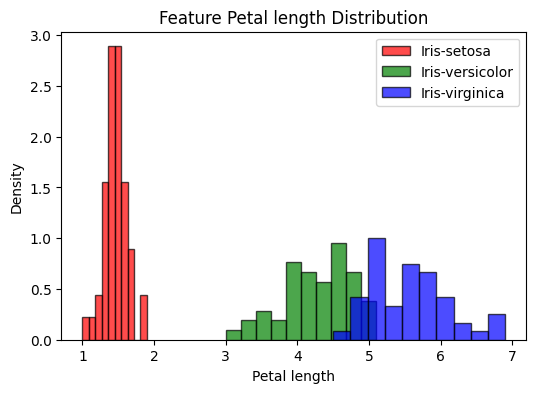

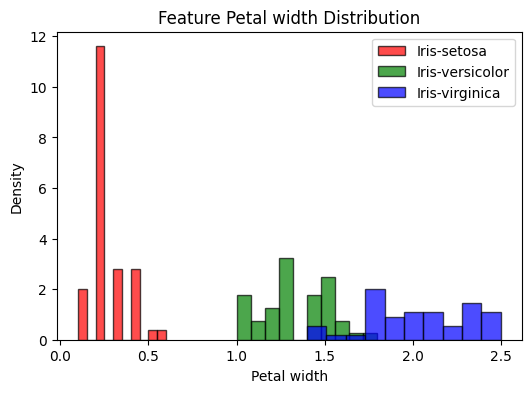

In [407]:
#Plot the four density histograms
densityFeaturePlots(x, y)

We can observe that there is large overlap for the first two features, whereas values for the third and
fourth features of iris-setosa are well separated from those of the other two flower families.

We now consider pairs of values and visualize the scatter plots of the different feature pairs for each class.

In [408]:

def scatterPlots(x, y):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 4
    rows = 4

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

## Point 3: Statistics Computation

### Dataset Mean

In [409]:
D.shape

(4, 150)

The for loop is, in general, slow. Numpy allows
computing the mean of an array through the method .mean. The method allows specifying an axis —
for 2-D arrays, axis = 0 allows computing the mean over rows, whereas axis = 1 allows computing
the means over columns

In [410]:
mu = D.mean(axis=1) #over columns
mu

array([5.8433347, 3.0573332, 3.7580001, 1.1993335], dtype=float32)

In [411]:
mu.shape

(4,)

Pay attention to the shape of D.mean(1): it’s a 1-D array, thus we convert it to a column vector through
the .reshape method

In [412]:
mu = mu.reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [413]:
mu.shape

(4, 1)

We now exploit broadcasting to **center the data**, i.e. to **remove the mean from all points**. Notice that we want the mean to be a column vector, so we first reshape it.

In [414]:
DC = D - mu #D centered, so with every element - mu
print(f"Before centering: {D[0][0:10]}\nAfter centering: {DC[0][0:10]}")

Before centering: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
After centering: [-0.7433348  -0.9433346  -1.1433349  -1.2433348  -0.8433347  -0.44333458
 -1.2433348  -0.8433347  -1.4433346  -0.9433346 ]


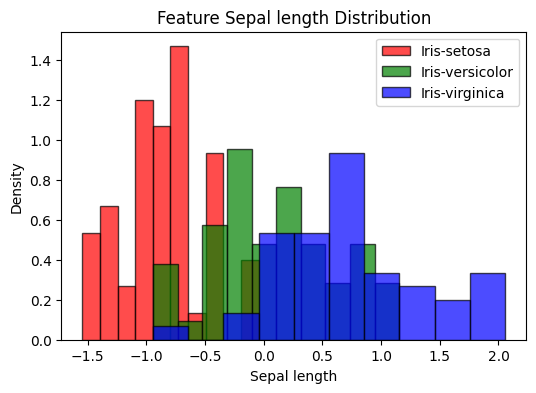

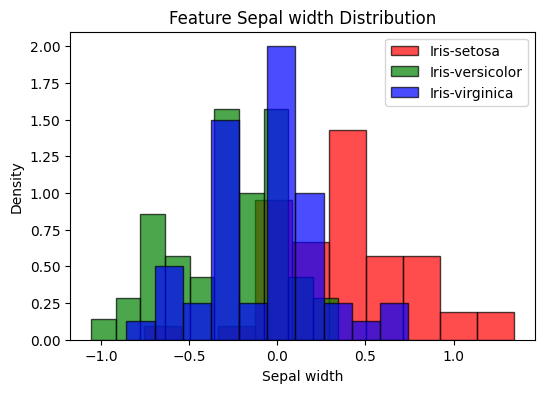

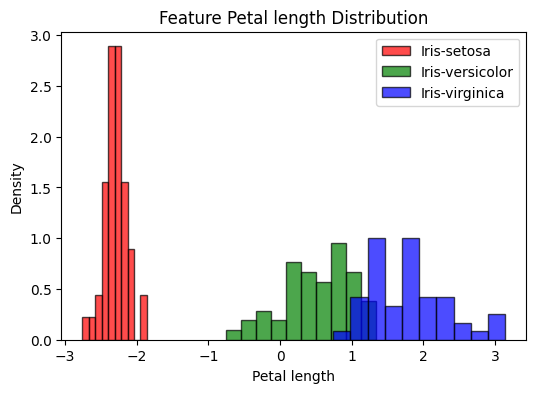

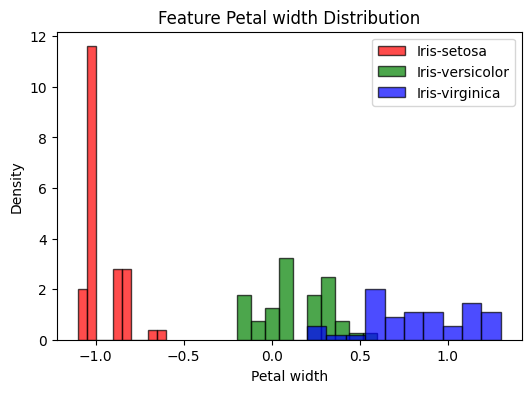

In [415]:
#Now I plot again the data that is now centered (the D vector changes)
x = DC

densityFeaturePlots(x, y)

Since the x are now centered, the x axis range is significantly smaller in the four plots

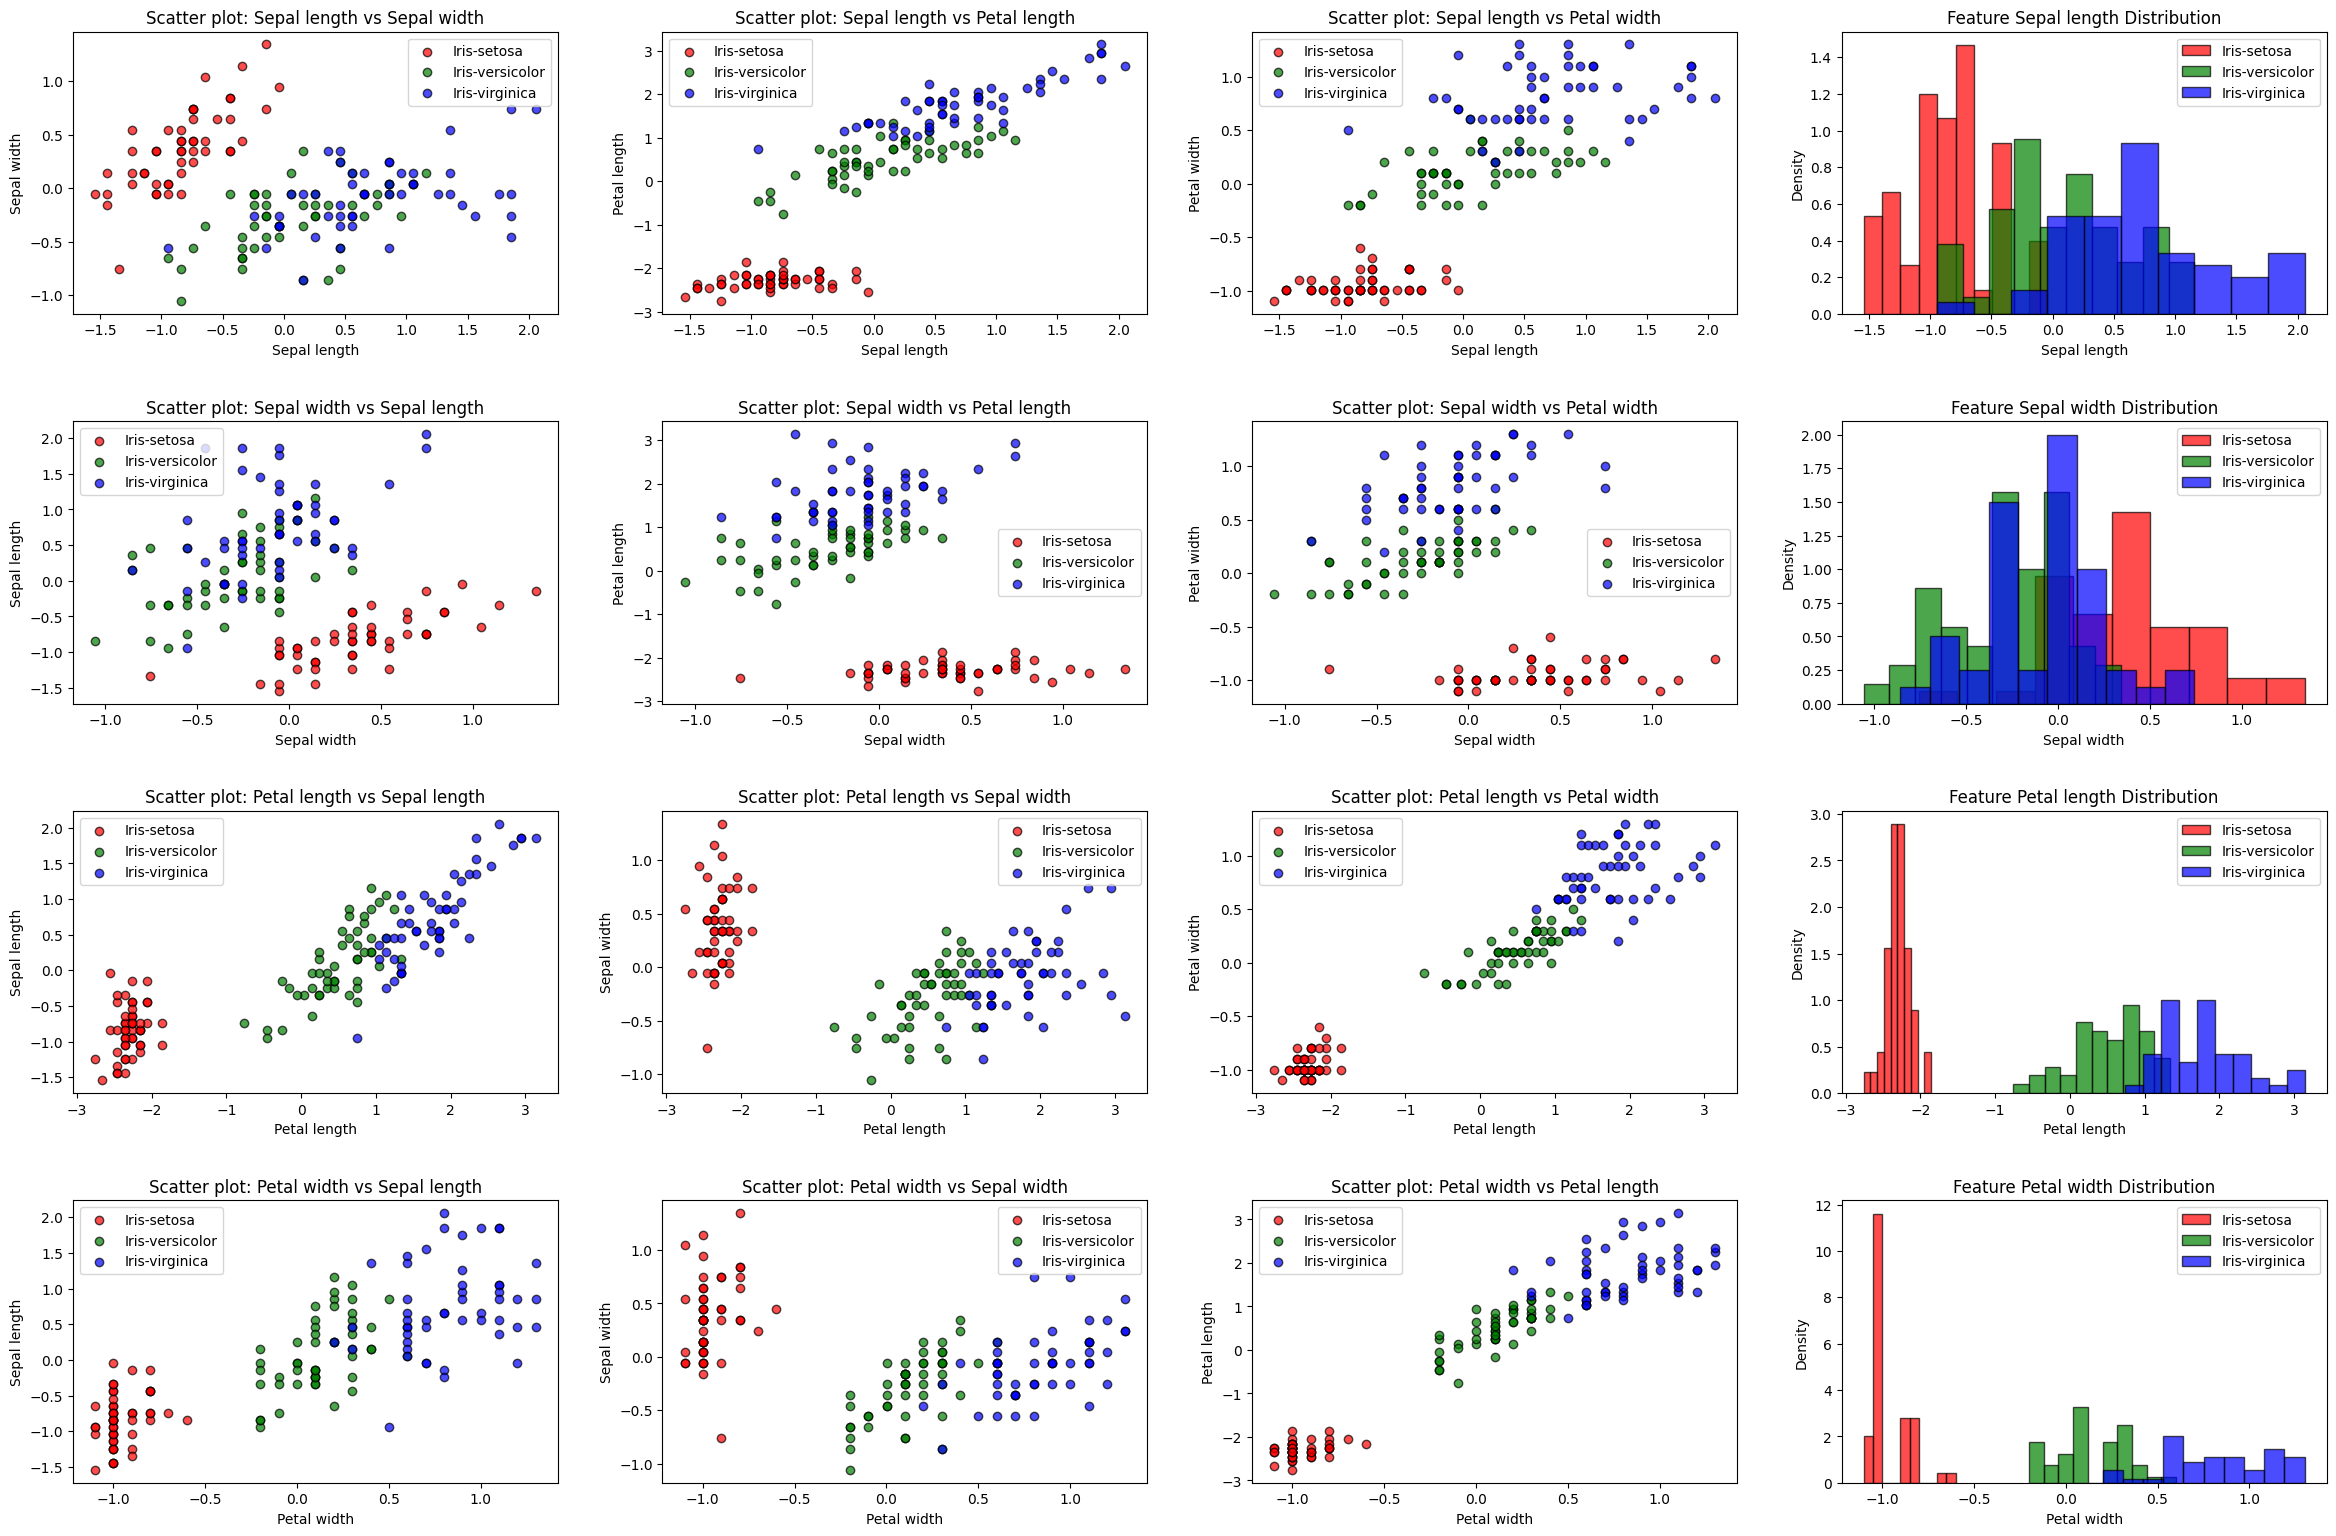

In [416]:
#Now I plot again the 16 scatterplots
x = DC
scatterPlots(x, y)

Now both the y and the x axis in the scatter plots have way smaller ranges since all the features values are centered.

### Covariance Matrix

The standard way of computing the covariance would be: <br> 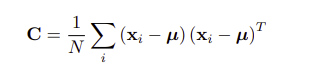

We can compute the covariance matrix using a for loop: <br>
```python
C = 0
for i in range(D.shape[1]):
C += (D[:, i:i+1] - mu) @ (D[:, i:i+1] - mu).T
C = C / float(D.shape[1])
``` 
<br>
Also in this case, the loop is slow. We can observe that we can arrange computations to express the
covariance matrix as: <br>

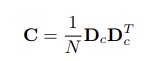

where Dc is the centered D numpy vector. <br>
In python:
```python
C = (DC @ DC.T) / float(D.shape[1])
```
where ```DC = D - mu```

In [417]:
#Compute the Covariance Matrix C using DC = D - mu
C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

In [418]:
C.shape

(4, 4)

The shape of the Covariance Matrix is (4,4) (it's always a square matrix) since we have four features and we compute the covariance for each **pair** of features!

In [419]:
C

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

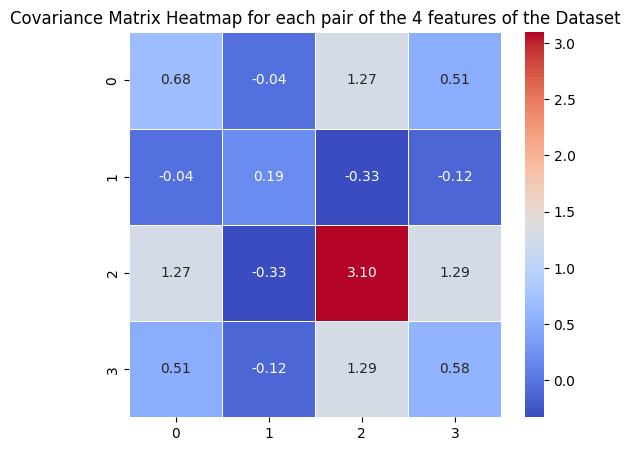

In [420]:
#Better representation with seaborn
#Seaborn function heatmap is more optimized than motplotlib function imshow so I use seaborn
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Covariance Matrix Heatmap for each pair of the 4 features of the Dataset")
plt.show()

# LAB3

## Dimensionality Reduction


### PCA - Principal Components Analysis

In [421]:
# mu is the mean computed on the columns of the D matrix of features: mu = D.mean(axis=1).reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [422]:
# C is the Covariance Matrix for the iris dataset, already computed before on the centered features DC = D - mu:


#Compute the Covariance Matrix C using DC = D - mu
#C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

C

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

In [423]:
print(f"Is C a square matrix? {C.shape}")

Is C a square matrix? (4, 4)


In [424]:
print(f"Is C a symmetrix matrix?\n {C == C.T}")

Is C a symmetrix matrix?
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


<ul>
<li> C is a square matrix
<li> C is symmetric (C = C.T) <br>
</ul>

-> **I can use eigen-decomposition**

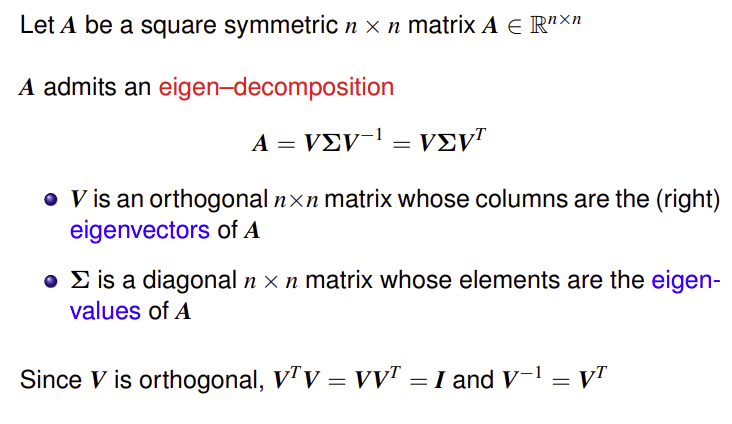

In [425]:
#Use numpy.linalg.eig vs numpy.linalg.eigh

#s = sigma, diagonal matrix containing the eigen valuez
#U = V, orthogonal matrix whose columns are the eigen vectors 

#1. Using numpy.linalg.eig the result are not sorted
s, U = np.linalg.eig(C)
print(f"Using eig:\n s: {s}\n U: {U}")

#2. Using numpy.linalg.eigh the result are sorted from  smallest to largest eigenvalues
s, U = np.linalg.eigh(C)
print(f"\nUsing eigh:\n s: {s}\n U: {U}")

#We will mainly use eigh in this case
print(f"\nShape of s: {s.shape}\nShape of U: {U.shape}")

Using eig:
 s: [4.2000546  0.24105279 0.07768784 0.02367693]
 U: [[ 0.36138648 -0.65658814 -0.58203006  0.3154882 ]
 [-0.08452249 -0.7301621   0.5979094  -0.3197243 ]
 [ 0.85667074  0.1733726   0.07623544 -0.4798389 ]
 [ 0.35828903  0.07548022  0.5458329   0.75365657]]

Using eigh:
 s: [0.02367693 0.07768784 0.24105279 4.2000546 ]
 U: [[ 0.3154882   0.58203006  0.65658814 -0.36138648]
 [-0.3197243  -0.5979094   0.7301621   0.08452249]
 [-0.4798389  -0.07623544 -0.1733726  -0.85667074]
 [ 0.75365657 -0.5458329  -0.07548022 -0.35828903]]

Shape of s: (4,)
Shape of U: (4, 4)


U is 4x4, in fact the dataset has 4 featues! So the original space has **4 dimensions**. The columns of U are the eigen-vectors corresponding to related eigen-values of s, which are also four (obviously). <br>
Later on I will write a function to apply PCA given any (reasonable, so from 1 to 4 in this case) value of m. For now I will maintain m = 4 so I won't reduce the subspace dimensionality, just extract relevant info.

In [426]:
# Set m in this case
m = 4

#The m leading eigenvectors can be
#retrieved from U (here we also reverse the order of the columns of U so that the leading eigenvectors are
#in the first m columns):

P = U[:, ::-1][:, 0:m]  #first reverse order of U to show leading eigen-vector first (so from highest to lowest), then take just the FIRST m COLUMNS of U!

print(f"P is the subspace derived from PCA setting m={m}:\n{P}")
print(f"Shape of P: {P.shape}")

P is the subspace derived from PCA setting m=4:
[[-0.36138648  0.65658814  0.58203006  0.3154882 ]
 [ 0.08452249  0.7301621  -0.5979094  -0.3197243 ]
 [-0.85667074 -0.1733726  -0.07623544 -0.4798389 ]
 [-0.35828903 -0.07548022 -0.5458329   0.75365657]]
Shape of P: (4, 4)


Since the covariance matrix is semi-definite positive, we can also get the sorted eigenvectors from the
**Singular Value Decomposition** (*SVD*). <br> This is the most general method used also for rectangular matrices, and generalizes eigen-decomposition:
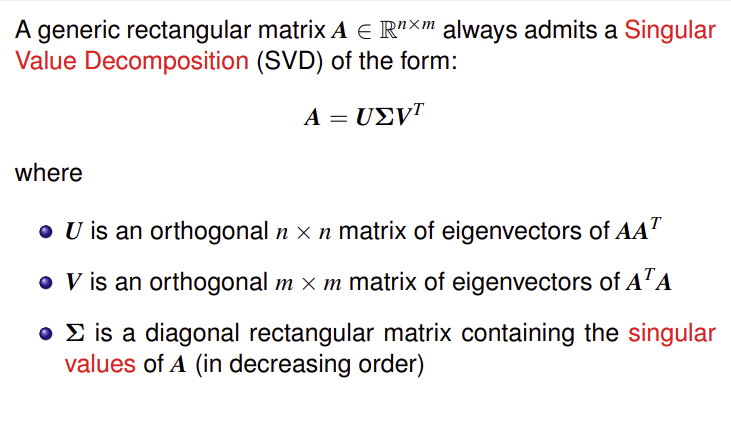

In [427]:
#U: left eigen vectors of A.T*A, so left singular vectors of A
#s = sigma -> singular values of A
#Vh = transpose of V -> right eigen vectors of A.T*A, so right singular vectors of A

U, s, Vh = np.linalg.svd(C)

#In this case, the singular values (which are equal to the eigenvalues) are sorted in descending order, and
#the columns of U are the corresponding eigenvectors

print(f"U:\n{U}\nShape of U: {U.shape}\n")
print(f"s: {s}\nShape of s: {s.shape}\n")
print(f"Vh:\n{Vh}\nShape of Vh: {Vh.shape}")

U:
[[-0.36138648 -0.65658814  0.58203006  0.3154882 ]
 [ 0.08452249 -0.7301621  -0.5979094  -0.3197243 ]
 [-0.85667074  0.1733726  -0.07623544 -0.4798389 ]
 [-0.35828903  0.07548022 -0.5458329   0.75365657]]
Shape of U: (4, 4)

s: [4.2000546  0.24105279 0.07768784 0.02367693]
Shape of s: (4,)

Vh:
[[-0.36138648  0.08452249 -0.85667074 -0.35828903]
 [-0.65658814 -0.7301621   0.1733726   0.07548022]
 [ 0.58203006 -0.5979094  -0.07623544 -0.5458329 ]
 [ 0.3154882  -0.3197243  -0.4798389   0.75365657]]
Shape of Vh: (4, 4)


### SVD vs Eigen Decomposition, computational costs

Svd is a generalization of Eigen Decomposition, so it works with every square symmetrix matrix as Eigen Decomposition, but also works with a borader range of cases (ex rectangular martrices). <br>

#### Computational Cost for Eigen decomposition:

1. We first have to compute the covariance matrix, which is $O(p^2 \cdot n)$.
2. Then Eigen Decomposition has a cost of $O(p^3)$.
3. So the total cost is $O(p^2 \cdot n + p^3)$.

#### Computational Cost for SVD:

SVD has a cost which is $O(min \{p^2 \cdot n, n^2 \cdot p\})$
-> This is usually more efficient!!

-> **You can always prefer SVD over Eigen Decomposition**
 

In [428]:
m=4

P = U[:, 0:m]

P

array([[-0.36138648, -0.65658814,  0.58203006,  0.3154882 ],
       [ 0.08452249, -0.7301621 , -0.5979094 , -0.3197243 ],
       [-0.85667074,  0.1733726 , -0.07623544, -0.4798389 ],
       [-0.35828903,  0.07548022, -0.5458329 ,  0.75365657]],
      dtype=float32)

Now, the last thing to do is to project the data in the subspace spanned by the m columns
of U corresponding to the m highest eigenvalues (matrix P) using projection rules:

<ul>
<li>y = P.T * x -- if we have a point x
<li>DP = P.T @ D -- if we have a matrix of samples D
</lu>

In [429]:
#Find the samples projected onto P:

DP = P.T @ D #it's the same as: DP = np.dot(P.T, D)

print(f"Shape of DP: {DP.shape}")
print(f"All the four features for each of the first 10 samples of the projected samples DP:\n{DP[:, :10]}")

Shape of DP: (4, 150)
All the four features for each of the first 10 samples of the projected samples DP:
[[-2.8182392  -2.7882233  -2.6133742  -2.757022   -2.7736483  -3.2215052
  -2.681827   -2.87622    -2.6159823  -2.829609  ]
 [-5.646349   -5.1499505  -5.1820025  -5.0086527  -5.6537066  -6.068283
  -5.237491   -5.490337   -4.74864    -5.2131777 ]
 [ 0.65977424  0.842323    0.6139584   0.6002993   0.54178035  0.46318242
   0.37396663  0.65373856  0.61109895  0.82949173]
 [-0.03108844  0.06567613 -0.01338259 -0.10892666 -0.09460958 -0.057552
  -0.08149443 -0.07864869 -0.06009554 -0.08964584]]


In [430]:
np.save(f"IRIS_PCA_matrix_m{m}.npy", P)

# np.load("IRIS_PCA_matrix_m4.npy") to load back the P matrix from the file

### Function for PCA

In [431]:
def computeC(D):
    '''
    Params:
    - D: Dataset features matrix, not centered

    Returned Values:
    - C: Covariance matrix of centered D
    '''
    
    mu = D.mean(axis = 1)                       #compute mu as a row array
    mu = mu.reshape((mu.shape[0], 1))           #reshape mu as a column array
    DC = D - mu                                 #center D
    C = (DC @ DC.T) / float(DC.shape[1])        #compute C, the Covariance Matrix, from DC

    return C

In [432]:
def calculatePCA(D, m):
    '''
    Params:
    - m: dimensionality of target subspace (m has to be <= dimensionality of original space of D)
    - D: Dataset features matrix, not centered

    Returned Values:
    - P: the subspace whose dimensionality is m
    '''

    #1. Compute C, the Covariance Matrix
    C = computeC(D)

    #2. Use SVD since it's usually more efficient than Eigen Decomposition and cover a broaders range of cases
    #   U: left eigen vectors of A.T*A, so left singular vectors of A
    #   s = sigma -> singular values of A
    #   Vh = transpose of V -> right eigen vectors of A.T*A, so right singular vectors of A
    U, s, Vh = np.linalg.svd(C)

    #3. The Eigen Values are already sorted from the largest to the smallest
    #   Take just the leading m Eigen Vectors describing the subspace P
    P = U[:, 0:m]

    #4. Return the subspace P
    return P



In [433]:
def applyPCA(D, P):
    '''
    Params:
    - D: Dataset features matrix, not centered
    - P: Subspace onto which you want to project the samples D
    '''

    #using np.dot or @ is the same
    return P.T @ D  #return np.dot(P.T, D)

### Testing PCA with m = 2, so reducing 2 dimensions from the original space

In [434]:

# Subspace P of m = 2 dimensions
m = 2
P_2 = calculatePCA(D, m)

print(f"Subspace caculated:\n {P_2}")

# Apply PCA and return the samples projected onto P

DP_2 = applyPCA(D, P_2)

print(f"Shape of DP_{m}: {DP_2.shape}") #shape is now (2, 150), not (4, 150) anymore! Dimensionality Reduction!
print(f"All the features for each of the first 10 samples of the projected samples DP_{m}:\n{DP_2[:, :10]}")

Subspace caculated:
 [[-0.36138648 -0.65658814]
 [ 0.08452249 -0.7301621 ]
 [-0.85667074  0.1733726 ]
 [-0.35828903  0.07548022]]
Shape of DP_2: (2, 150)
All the features for each of the first 10 samples of the projected samples DP_2:
[[-2.8182392 -2.7882233 -2.6133742 -2.757022  -2.7736483 -3.2215052
  -2.681827  -2.87622   -2.6159823 -2.829609 ]
 [-5.646349  -5.1499505 -5.1820025 -5.0086527 -5.6537066 -6.068283
  -5.237491  -5.490337  -4.74864   -5.2131777]]


Now 2 features (the last 2) are gone, and I have just the first 2 features -> they are related to the leading eigen vectors!

In [435]:
def scatterPlots2(x, y, numFeatures):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 2

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

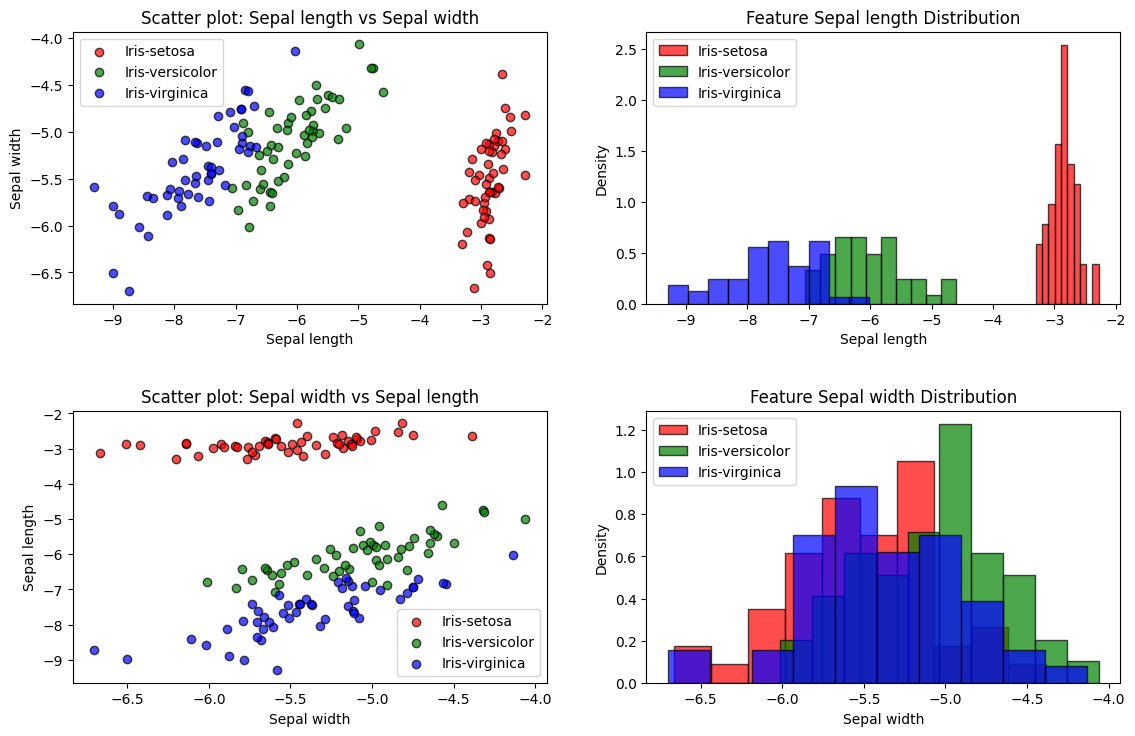

In [436]:
# Scatter Plot of the 2 components
scatterPlots2(DP_2, y, DP_2.shape[0])

**NOTE: your image may be flipped over one or both axes, due to the fact that eigenvectors are defined up to their sign. Flipping the sign of an eigenvector would result in a flipped image, but the solutions are equivalent.**

## LDA - Linear Discriminant Analysis

The goal is to compute the LDA Transformation Matrix, **W**. <br>
We start by computing the between and within class covariance matrices: <br> <br>
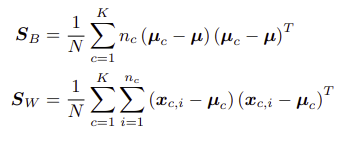


In [437]:
# select alla samples of class 0
D_c0 = D[:, L==0]
print(f"All samples of class 0:\n{D_c0}\n")
print(f"Shape: {D_c0.shape}")

All samples of class 0:
[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]
 [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
  1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
  1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
 [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]]

Shape: (4, 50)


In [438]:
#Compute Sw, Sb

def computeSwSb(D, L):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples

    Returned Values:
    - Sw: Within-class scatter matrix
    - Sb: Between-class scatter matrix
    '''

    #find the unique labels for each class
    uniqueLabels = np.unique(L)

    #nc in the formula is computed as the number of samples of class c
    #separate data into classes
    DC = [D[:, L == label] for label in uniqueLabels]  #DC[0] -> samples of class 0, DC[1] -> samples of class 1 etc...

    #compute nc for each class
    #each element in DC has a shape which is (4, DC_i.shape[1]) (assuming samples are not equally distributed among all the classes which is true in 99% of cases...)
    #So for nc I just have to take DC_i.shape[1] for each i in DC
    nc = [DC_i.shape[1] for DC_i in DC]

    #Compute the mean as done before with PCA
    mu = D.mean(axis=1)
    mu = mu.reshape((mu.shape[0], 1))

    #Now compute the mean for each class
    muC = [DC[label].mean(axis=1) for label, labelName in enumerate(uniqueLabels)]
    muC = [mc.reshape((mc.shape[0], 1)) for mc in muC]

    Sb = 0  #between matrix initialization
    Sw = 0  #within  matrix initialization

    #iterate over all the classes to execute the summations to calculate the 2 matrices
    for label, labelName in enumerate(uniqueLabels):

        #1) FOR SB:
        #add up to the Sb (between) matrix
        diff = muC[label] - mu
        Sb += nc[label] * (diff @ (diff.T)) #nc * ((muC - mu) * (muC - mu).T)


        #2) FOR SW
        #add up to the Sw (within) matrix
        #for diff1 subtract the the class mean from the samples of each class, i.e center center the samples for each class 
        diff1 = DC[label] - muC[label]  #x_{c, i} - muC done by rows

        #SHORTCUT: compute the Sw matrix as a weighted sum of the covariance matrices of each class
        #so for each class:
        #Compute the Covariance Matrix C using DC = D - mu
        C_i = (diff1 @ diff1.T) / float(diff1.shape[1])  #Covariance matrix for class i

        #weighted sum of all the C_i
        Sw += nc[label] * C_i

    
    #at the end of the summations, just multiply by 1/N (N is the number of samples)

    Sb = Sb / D.shape[1]
    Sw = Sw / D.shape[1]

    #return both matrices
    return Sb, Sw
        


In [439]:
Sb, Sw = computeSwSb(D, L)
print(f"Sb matrix:\n{Sb}\nShape:{Sb.shape}\n")
print(f"Sw matrix:\n{Sw}\nShape:{Sw.shape}")

Sb matrix:
[[ 0.42141423 -0.133018    1.1016563   0.47519568]
 [-0.133018    0.07563294 -0.3815974  -0.15288445]
 [ 1.1016563  -0.3815974   2.9140193   1.2451603 ]
 [ 0.47519568 -0.15288445  1.2451603   0.53608906]]
Shape:(4, 4)

Sw matrix:
[[0.25970796 0.09086665 0.16416402 0.03763333]
 [0.09086665 0.11308001 0.05413865 0.032056  ]
 [0.16416402 0.05413865 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.04104401]]
Shape:(4, 4)


Once matrices Sb, Sw are obtained, we need to compute the LDA directions, which are the columns of W matrix, so its eigen vectors.

### LDA Method 1: Generalized Eingenvalue problem

We need to compute: <br>
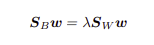 <br>

Sw is positive definite (all eigenvalues are greater than 0). To solve the **generalized Eigenvalue problem** `numpy.linalg.eigh` is not enough since it just supports one matrix. The `scipy.linalg.eigh`, on the other hand, supports two matrices (arguments a, b=None by default).

Doc: (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html) <br>
*scipy.linalg.eigh(a, b=None, \*, lower=True, eigvals_only=False, overwrite_a=False, overwrite_b=False, type=1, check_finite=True, subset_by_index=None, subset_by_value=None, driver=None)*. <br>
Solve a standard or generalized eigenvalue problem for a complex Hermitian or real symmetric matrix. <br>

Find eigenvalues array w and optionally eigenvectors array v of array a, where b is positive definite such that for every eigenvalue λ (i-th entry of w) and its eigenvector vi (i-th column of v) satisfies: <br>
              a @ vi = λ * b @ vi <br>
vi.conj().T @ a @ vi = λ    <br>
vi.conj().T @ b @ vi = 1    <br> <br>
Returns: <br>
w: <br>
(N,) ndarray <br>
The N (N<=M) selected eigenvalues, in ascending order, each repeated according to its multiplicity. <br>

v: <br>
(M, N) ndarray <br>
The normalized eigenvector corresponding to the eigenvalue w[i] is the column v[:,i]. Only returned if eigvals_only=False. <br>

In [440]:
import scipy as sc


def calculateLDA(D, L, m):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples
    - m: number of discriminant directions of the target subplane

    Returned Values:
    - W: LDA matrix containing the most discriminant directions, which are the m leading Eigenvectors found solving the generalized Eigenvalues problem for matrices Sb, Sw
    '''

    #1) first, compute S between, S within matrices
    Sb, Sw = computeSwSb(D, L)

    #2) then, solve the generalized Eigenvalues problem
    #matrix a is Sb -> I wanna find the eigvalues of (Sw)^{-1} * Sb 
    #matrix b is Sw which is positive definite

    #sigma -> w ndarray of eigenvalues of inverse of matrix b * matrix a
    #U -> v ndarray of corresponding eigenvectors of invers of matrix b * matrix a -> they are sorted from lowest to highest as in the numpy counterpart!
    sigma, U = sc.linalg.eigh(a=Sb, b=Sw)

    #I don't mind about sigma since I want the LDA directions which are the eigenvectors of U
    #Take the leading m eigenvectors of U to create matrix W of LDA main directions (first I have to sort U from highest to lowest so the other way around):
    W = U[:, ::-1][:, 0:m]

    return W


def applyLDA(D, W):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - W: LDA matrix containing the most discriminant directions, which are the m leading Eigenvectors found solving the generalized Eigenvalues problem for matrices Sb, Sw

    Returned Values:
    - W: The projection of the dataset onto the subplane having the m most discriminant directions
    '''

    return W.T @ D




**Remember that we can compute at most 2 discriminant directions, since we have 3 classes!**

LDA Scatterplots:



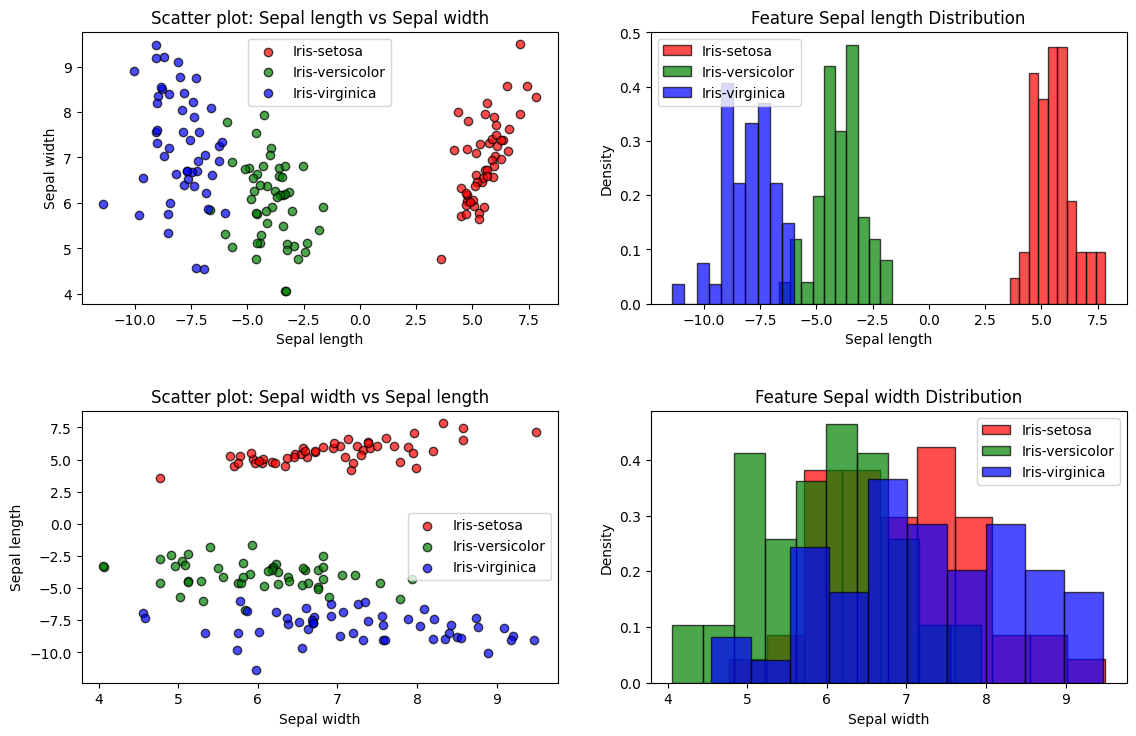

In [441]:
#Testing with m = 2 most discriminant directions
W_2 = calculateLDA(D, L, m=2)

DP_2_LDA = applyLDA(D, W_2)

print("LDA Scatterplots:\n")
scatterPlots2(DP_2_LDA, L, DP_2_LDA.shape[0])


PCA Scatterplots:



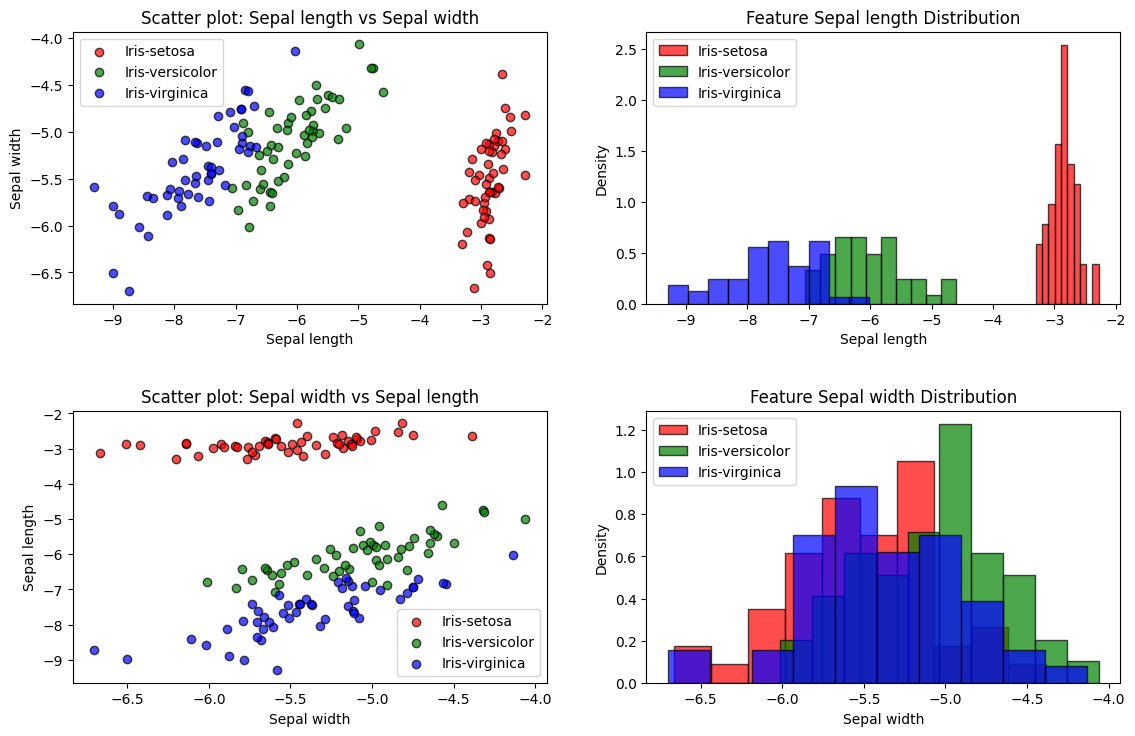

In [442]:
print("PCA Scatterplots:\n")
scatterPlots2(DP_2, L, DP_2.shape[0])

In [443]:
np.load("IRIS_LDA_matrix_m2.npy")

array([[ 0.83779794,  0.02434685],
       [ 1.55005187,  2.18649663],
       [-2.22355955, -0.94138258],
       [-2.83899363,  2.86801283]])

In [444]:
W_2

array([[ 0.83779967,  0.02432493],
       [ 1.55005   ,  2.186504  ],
       [-2.2235608 , -0.9413757 ],
       [-2.838992  ,  2.868018  ]], dtype=float32)

Wrt PCA, now the samples of class Iris-versicolor (green) are **more separated** from the samples belonging to class Iris-virginica (class blue)!

**Comparing Density plots of PCA (top) and LDA (bottom)**:

In [445]:
def densityPlots(x, y, numFeatures, title=None):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 1

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    if title:
        fig.suptitle(title, fontsize=16)  # General title
    plt.show()

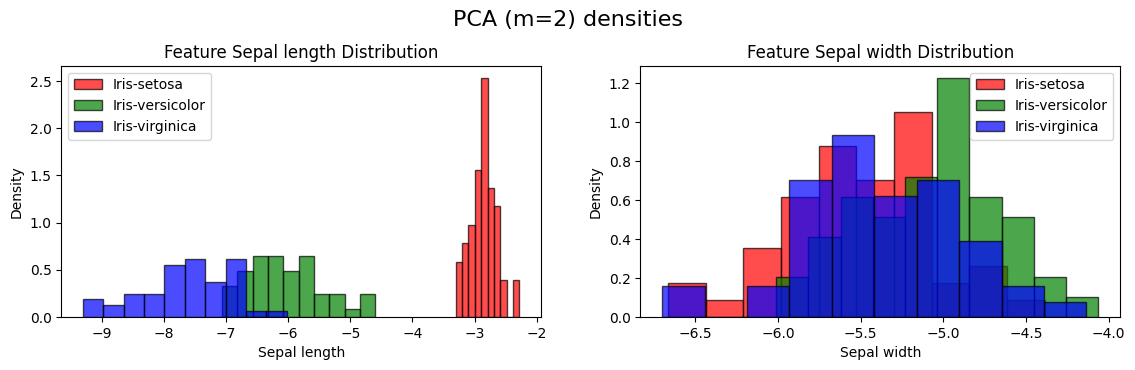

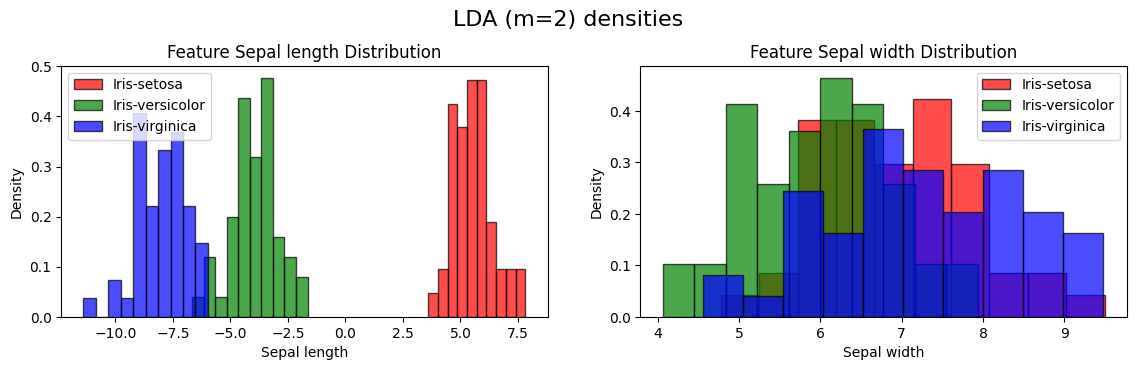

In [446]:
#PCA density plots 
densityPlots(DP_2, L, DP_2.shape[0], "PCA (m=2) densities")

#LDA density plota
densityPlots(DP_2_LDA, L, DP_2_LDA.shape[0], "LDA (m=2) densities") 

We can observe that the first LDA direction (x-axis in the scatter plots) results in lower overlapping of
the green and the orange classes, which can thus be better separated along this direction.

### LDA Method 2: Solving the Eigenvalue problem by joint diagonalization of Sb and Sw <br> 
A way to solve the generalized eigenvalue problem, and thus find
the LDA matrix W, consists in the **joint diagonalization of Sw and Sb that makes Sw become the identity matrix and Sb become a diagonal matrix**. <br>
This way the LDA computation, once having Sw and Sb (calculated with the function *computeSwSb(D, L)* defined before) is done by breaking the problem in two steps (each step corresponds to one transformation): 

1. Whiten Sw -> estimate matrix $P_{1}$ so that the within class covariance of the transormed points $P_{1} \cdot x$ is the identity. So we apply $P_{1} \cdot Sw \cdot P_{1}^{T}$ <br>
Here we can compute the Eigen decomposition and apply the whitening transformation which is simply elevate the sigma diagonal matrix to the power of $-1/2$: <br>
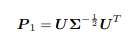 <br>
Where first I apply the SVD, then I elevate sigma to the power of $-1/2$.
Then I found P1 by calculating the dot product: $U \cdot sigma^{-1/2} \cdot U^{T}$. <br>
Then the transformed between class covariance $S_{BT}$ can be computed as: $S_{BT} = P_{1} \cdot Sb \cdot P_{1}^{T}$.

2. Projection on the leading eigenvectors of the transformed between class covariance Sb -> We finally need to compute the matrix $P_{2}$ of eigenvectors of $S_{BT}$ corresponding to its m highest eigenvalues.

At the end, the LDA matrix W is given by $W = P_{1}^{T} \cdot P_{2}$, and the LDA transformation is $y = W^{T} \cdot x$. Again, we can observe that the solution is not orthogonal.



Let's apply this second method:

In [447]:
def calculateLDAbyJointDiagonalization(D, L, m):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples
    - m: number of discriminant directions of the target subplane

    Returned Values:
    - W: LDA matrix containing the most discriminant directions, calculated solving teh generalized Eigenvalue problem by joint diagonalization of Sw and Sb
    '''

    #0) first, compute S between, S within matrices as before
    Sb, Sw = computeSwSb(D, L)

    #Joint diagonaization:

    #Step 1: Whiten Sw
    #Compute SVD on matrix Sw to find U and sigma (Vh is useless)
    U, sigma, Vh = np.linalg.svd(Sw)

    #U = matrix of singular vectors of Sw
    #sigma = matrix of singular values of Sw

    #Compute P1
    #sigma needs to be to the power of -1/2 first, then use dot products: 
    #a. compute U @ sigma^{1/2}
    #b. compute (U @ sigma^{1/2}) @ U.T
    P1 = U @ np.diag(1.0/(sigma**0.5)) @ U.T

    #Compute Sbt = Sbt = P1 @ Sb @P1 -> Sbt is the transformed between class covariance
    Sbt = P1 @ Sb @ P1.T

    #Compute P2, which is the matrix of eigenvectors of Sbt corresponding to its m highest eigenvalues -> so use SVD again
    U2, sigma2, Vh2 = np.linalg.svd(Sbt) #with SVD the eigvectors are already ordered from the highest to the lowest

    #just take the leading m eigvectors
    P2 = U2[:, 0:m]



    #Step 2: Find matrix W as W = P1.T @ P2
    return P1.T @ P2



#Already defined, it's the same as before
#def applyLDA(D, W):
#
#    return W.T @ D




In [448]:
#Testing the second method:
W_2_JointDiag = calculateLDAbyJointDiagonalization(D, L, m=2)

W_2_JointDiag


array([[-0.83779943, -0.02432996],
       [-1.5500509 , -2.1865053 ],
       [ 2.2235613 ,  0.9413737 ],
       [ 2.8389919 , -2.8680096 ]], dtype=float32)

In [449]:
#The 2 methods are equivalent BUT THE EIGVECTORS SIGN MAY CHANGE AS BEFORE:
W_2

array([[ 0.83779967,  0.02432493],
       [ 1.55005   ,  2.186504  ],
       [-2.2235608 , -0.9413757 ],
       [-2.838992  ,  2.868018  ]], dtype=float32)

In [450]:
DP_2_LDA_JointDiag = applyLDA(D, W_2_JointDiag)

LDA Scatterplots, Method 2 (Joint Diagonalization):



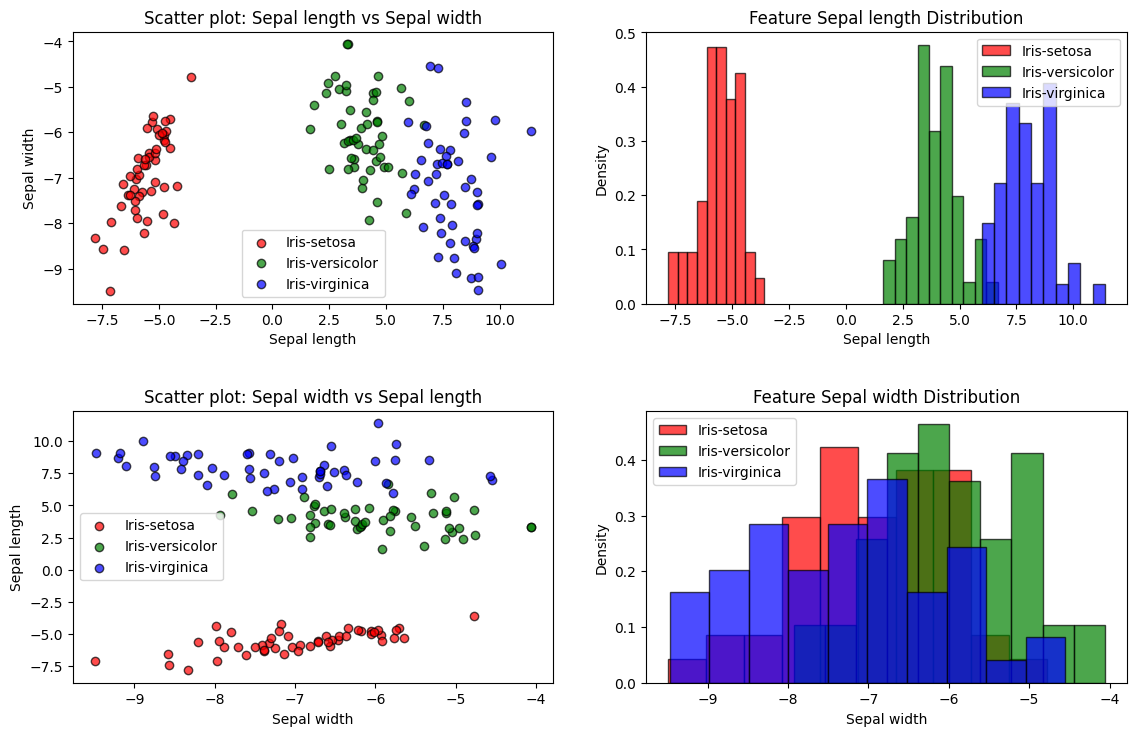

In [451]:
print("LDA Scatterplots, Method 2 (Joint Diagonalization):\n")
scatterPlots2(DP_2_LDA_JointDiag, L, DP_2_LDA_JointDiag.shape[0])

## PCA and LDA for classification

In this section we use PCA and LDA for **binary classification**. In particular, we just select 2 classes from the Iris Dataset (which are *Iris versicolor* and *Iris virginica* classes, whose labels are 1 and 2). <br>
So, at first we just select these two classes from the full dataset:

In [452]:
import sklearn

def loadIris2():
    """
    Function to load the iris dataset.

    Returned Values:
    D, L
    """
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

In [453]:
#Load Iris and extract just the classes labeled as 1, 2 (so discard Iris setosa, which has label 0)
D_fullIris, L_fullIris, = loadIris2()

print(f"D_fullIris has a shape of: {D_fullIris.shape}\nL_fullIris has a shape of: {L_fullIris.shape}")

D = D_fullIris[:, L_fullIris != 0]
L = L_fullIris[L_fullIris != 0]

print(f"D has a shape of: {D.shape}\nL has a shape of: {L.shape}")
   


D_fullIris has a shape of: (4, 150)
L_fullIris has a shape of: (150,)
D has a shape of: (4, 100)
L has a shape of: (100,)


In [454]:
#computeSwSb(D , L )
print(i for i in np.unique(L))

<generator object <genexpr> at 0x000001CF71E1DA80>


In particular, we employ
LDA to identify the (single, since we have only 2 classes) discriminant direction of the two-class version
of the dataset (which, in general, may differ from the discriminant directions of the 3-class problem).
We will also employ PCA as a pre-processing for LDA.

We cannot
directly evaluate the performance of the model on the data that was used to learn the model parameters.
Indeed, the result may be **over-optimistic** (there's the risk of **OVERFITTING**), since the real data that we will want to classify will be data
that has not been seen during training. To reduce the bias, we therefore need to simulate an application
scenario, i.e. we want to evaluate the model on data that was not used during training.


So, we begin by splitting the data into **training data** and **validation data**. <br>
We'll use a simple random split assigning $2/3$ of the samples to the training data and the remaining part to the validation data:

In [455]:
D.shape[1]

100

In [456]:
np.random.permutation(D.shape[1])

array([18, 29, 64, 92, 72, 87,  5, 15, 12, 17, 61, 76,  9, 78, 80,  7, 33,
        6, 37, 74, 79,  1, 45, 28, 60, 52, 25, 39, 97, 44, 16, 55, 83, 49,
       22, 70, 47,  4, 82, 94, 53, 66, 26, 84, 31, 63,  8, 75, 98, 57, 71,
       99, 86, 96, 69, 24, 30, 13, 40, 56, 68, 95, 81, 19, 38, 91, 54, 32,
       51, 85, 11, 89, 90, 36, 65, 88, 41, 14, 27, 50, 20, 46, 67, 35, 62,
        2, 59, 23, 58, 43, 10,  0, 73, 21, 77, 42,  3, 93, 48, 34],
      dtype=int32)

In [457]:
def splitTrainingValidation(percentageTraining, D, L, seed=0):
    """"
    Function to splot the data into 2 partitions: the training one and the validation one.
    The splitting is done randomly so the seed needs to be initialized first.

    Params:
    - percentageTraining: percentage of training data over the overall data 
    - D
    - L
    - seed: valie of the seed for the random split, default is 0

    Returned Values:
    - (DTR, LTR), (DVAL, LVAL):
        DTR and LTR are model training data and labels
        DVAL and LVAL are validation data and labels
    """

    #set cardinality of training partition
    #Obviously since we cannot have fractional samples, this number is rounded
    nTrain = int(D.shape[1] * percentageTraining)

    #initialize the seed for the random split
    np.random.seed(seed)

    #shuffle the data indices by making a random permutation
    """
    example of usage: 
    np.random.permutation(100) returns: 
    array([45, 97, 37, 87, 36,  7,  0, 23, 24, 31, 75, 35, 68, 53, 65,  8, 84,
       41, 20, 56, 81, 12, 47, 72, 63, 38,  6, 58, 91, 48, 92, 88, 71, 29,
       46, 10, 14, 18, 27, 98, 67, 76, 78, 54, 90, 17, 50, 55,  4, 21, 19,
       32, 95, 15,  5, 64, 93, 69, 52, 89,  2, 42, 43, 82, 44, 99, 85, 13,
       34, 94, 74, 80, 70,  3, 77, 73,  1, 11, 28, 16, 62, 96, 22, 66, 49,
       57, 60, 51,  9, 59, 26, 33, 39, 61, 79, 86, 40, 83, 25, 30],
      dtype=int32)
    """

    shuffledIndices = np.random.permutation(D.shape[1])

    #Split randomically accordin to the percentage
    #TRAINING DATA
    DTR = D[:, shuffledIndices[0:nTrain]]
    LTR = L[shuffledIndices[0:nTrain]]

    #VALIDATION DATA
    DVAL = D[:, shuffledIndices[nTrain:]]
    LVAL = L[shuffledIndices[nTrain:]]

    return (DTR, LTR), (DVAL, LVAL)




In [458]:
#Execute the train validation split
trainingPercentage = 2.0/3.0
(DTR, LTR), (DVAL, LVAL) = splitTrainingValidation(trainingPercentage, D, L)
#(DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L)


print(f"Shape of training DTR, LTR: {DTR.shape}, {LTR.shape}\n")
print(f"Shape of validation DVAL, LVAL: {DVAL.shape}, {LVAL.shape}\n")



Shape of training DTR, LTR: (4, 66), (66,)

Shape of validation DVAL, LVAL: (4, 34), (34,)



In [ ]:
#Apply PCA with m = 1
W_1_JointDiag = calculateLDA(DVAL, LVAL, m=1)


